In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from nltk import word_tokenize
import string
import re

import warnings
warnings.filterwarnings("ignore")


In [2]:
import pandas as pd
df = pd.read_csv('Phishing.csv')
df = df.sample(frac = 1)
df

,Features,Boolean
10588,base64'. None). ('text/html'. 'quoted-printabl...,0
18397,Err:509,0
1133,Open in New Tab <http://emaila.goglogo.com/ltr...,1
10789,This is a system generated mail. Please do not...,0
17585,Â Â Â Â Daily Newsletter Â Â Monday. 16th May ...,0
...,...,...
14772,From: somesha m <somesh.naik@gmail.com>Date: F...,0
1423,If you are not able to view. please click here...,1
9838,quoted-printable'. '*Sir/Madam.*Department of ...,0
17644,base64'. None). ('text/html'. 'Apply today! Ac...,0


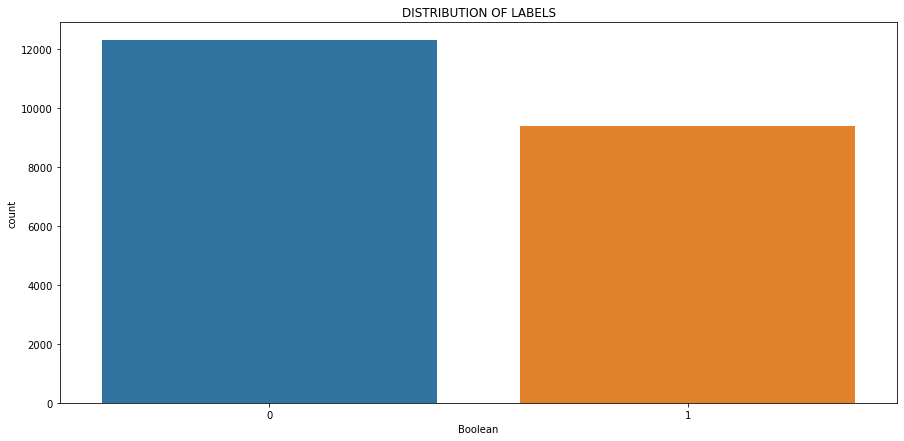

In [3]:
# Let's visualize the Label distiributions using seaborn
plt.figure(figsize=(15,7))
sns.countplot(x='Boolean',data=df)
plt.title("DISTRIBUTION OF LABELS")
plt.show()

In [4]:
def clean_text(sentence):
    '''
        function to clean content column, make it ready for transformation and modeling
    '''
    #  print(type(sentence))
    sentence = sentence.lower()                #convert text to lower-case
    sentence = re.sub('â€˜','',sentence)    # remove the text â€˜ which appears to occur flequently
    sentence = re.sub('[‘’“”…,]', '', sentence) # remove punctuation
    sentence = re.sub('_', '', sentence) # remove underscore
    sentence = re.sub('[()]', '', sentence)  #remove parentheses
    #sentence = re.sub("[^a-zA-Z]"," ",sentence) #remove numbers and keep text/alphabet only
    sentence = word_tokenize(sentence)      # remove repeated characters (tanzaniaaaaaaaa to tanzania)

    return ' '.join(sentence)

In [5]:
# Applying our clean_text function on contents
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/nitk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
df['Features'] = df['Features'].apply(lambda x: str(x))
df['Boolean'] = df['Boolean'].apply(lambda x: str(x))
df['Features'] = df['Features'].apply(clean_text)
df.head()

,Features,Boolean
10588,base64 ' . none . 'text/html ' . 'quoted-print...,0
18397,err:509,0
1133,open in new tab < http : //emaila.goglogo.com/...,1
10789,this is a system generated mail . please do no...,0
17585,â â â â daily newsletter â â monday . 16th may...,0


In [7]:
df['Features'] = df['Features'].apply(lambda x: str(x))
df['Boolean'] = df['Boolean'].apply(lambda x: str(x))

In [8]:
df = df[['Features', 'Boolean']]
SEED = 2020
df_train = df.sample(frac=0.75, random_state=SEED)
df_test = df.drop(df_train.index)
len(df_train), len(df_test)

(16259, 5420)

In [9]:
import ktrain
from ktrain import text

# selecting transformer to use
MODEL_NAME = 'bert-base-uncased'

# Common parameters
MAXLEN  = 128
batch_size = 32
learning_rate = 5e-5
epochs = 10

In [10]:
t = text.Transformer(MODEL_NAME, maxlen = MAXLEN)
trn = t.preprocess_train(df_train.Features.values, df_train.Boolean.values)
val = t.preprocess_test(df_test.Features.values, df_test.Boolean.values)
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=batch_size)
history = learner.fit(learning_rate, epochs)

preprocessing train...
language: en
train sequence lengths:
	mean : 295
	95percentile : 1279
	99percentile : 3052


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 303
	95percentile : 1367
	99percentile : 3107


Epoch 1/10
509/509 [==============================] - 2760s 5s/step - loss: 0.0956 - accuracy: 0.9670 - val_loss: 0.0607 - val_accuracy: 0.9777
Epoch 2/10
509/509 [==============================] - 2538s 5s/step - loss: 0.0447 - accuracy: 0.9849 - val_loss: 0.0494 - val_accuracy: 0.9836
Epoch 3/10
509/509 [==============================] - 2525s 5s/step - loss: 0.0337 - accuracy: 0.9878 - val_loss: 0.0480 - val_accuracy: 0.9836
Epoch 4/10
509/509 [==============================] - 2516s 5s/step - loss: 0.0348 - accuracy: 0.9877 - val_loss: 0.0468 - val_accuracy: 0.9847
Epoch 5/10
509/509 [==============================] - 2508s 5s/step - loss: 0.0336 - accuracy: 0.9884 - val_loss: 0.0523 - val_accuracy: 0.9832
Epoch 6/10
509/509 [==============================] - 2502s 5s/step - loss: 0.0270 - accuracy: 0.9905 - val_loss: 0.0498 - val_accuracy: 0.9839
Epoch 7/10
509/509 [==============================] - 2503s 5s/step - loss: 0.0281 - accuracy: 0.9899 - val_loss: 0.0914 - val_accuracy:

In [11]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
xc=range(len(train_loss))

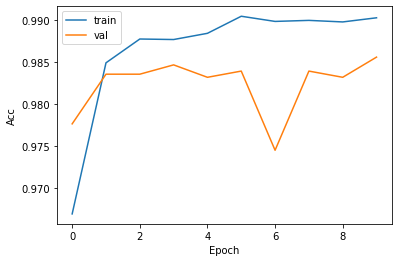

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])

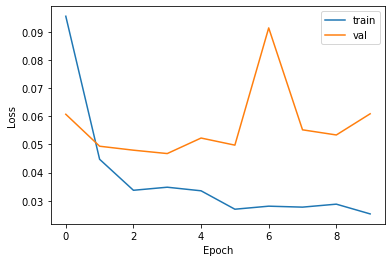

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

In [14]:
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109,483,778
Trainable params: 109,483,778
Non-trainable params: 0
_________________________________________________________________


In [15]:
learner.validate(val_data=val, class_names=t.get_classes())

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3069
           1       1.00      0.97      0.98      2351

    accuracy                           0.99      5420
   macro avg       0.99      0.98      0.99      5420
weighted avg       0.99      0.99      0.99      5420



array([[3061,    8],
       [  70, 2281]])

In [16]:
classifier = ktrain.get_predictor(learner.model, t)

In [17]:
classifier.save('model/MODEL2')